In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns # It is used for data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

c:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

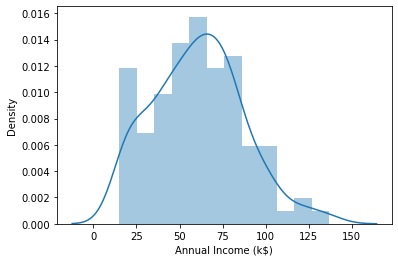

In [6]:
sns.distplot(df['Annual Income (k$)'],bins=12)

c:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

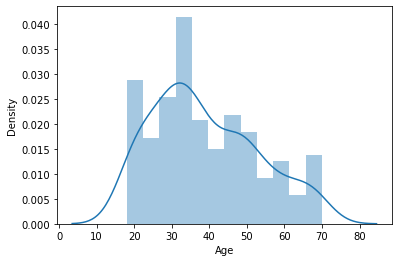

In [7]:
sns.distplot(df.Age,bins=12)

c:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

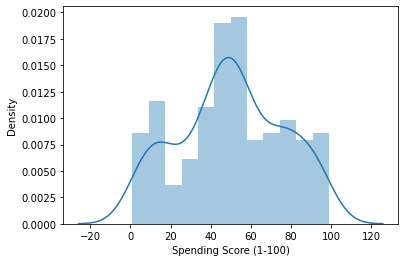

In [8]:
sns.distplot(df['Spending Score (1-100)'],bins=12)

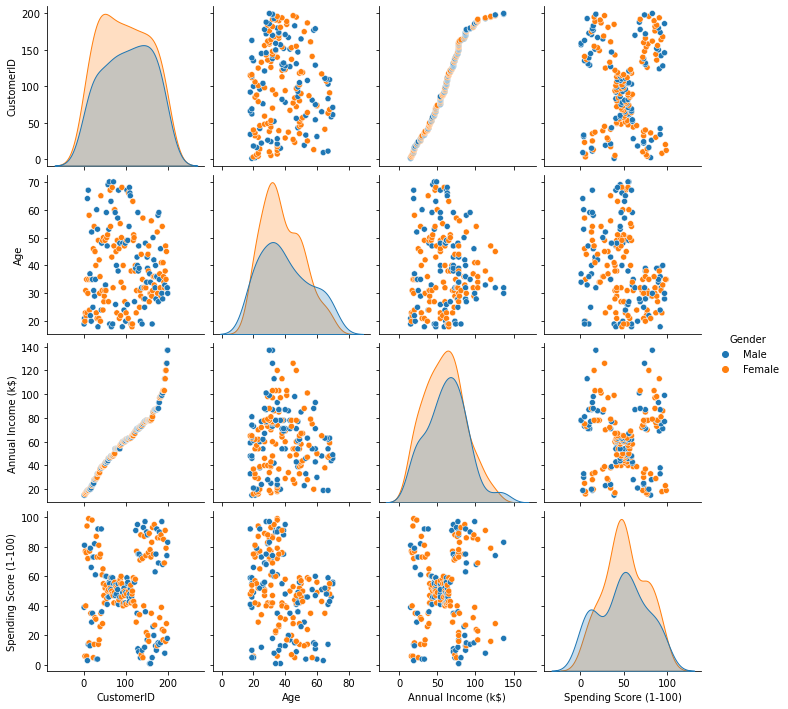

In [9]:
sns.pairplot(df,hue='Gender')

#### we can find the pattens in spending vs Annual income

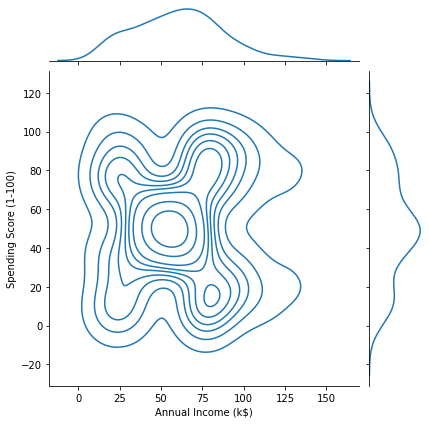

In [10]:
#2D Density plot, contors-plot
sns.jointplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, kind="kde")
plt.show()

<AxesSubplot:>

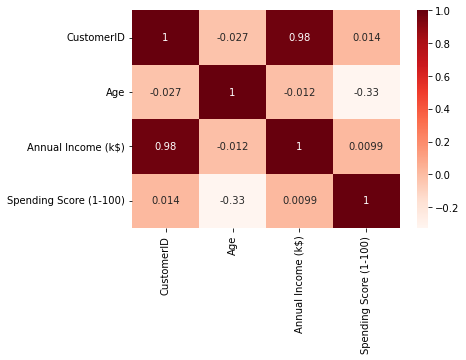

In [11]:
sns.heatmap(df.corr(), cmap='Reds',annot=True)  

### feature eng

In [12]:
new_df=df.drop(['Gender'],axis=1)

print(new_df.shape)
male=pd.get_dummies(df['Gender'],drop_first=True)

new_df = pd.concat([new_df,male],axis=1)

print(new_df.shape)

(200, 4)
(200, 5)


<AxesSubplot:>

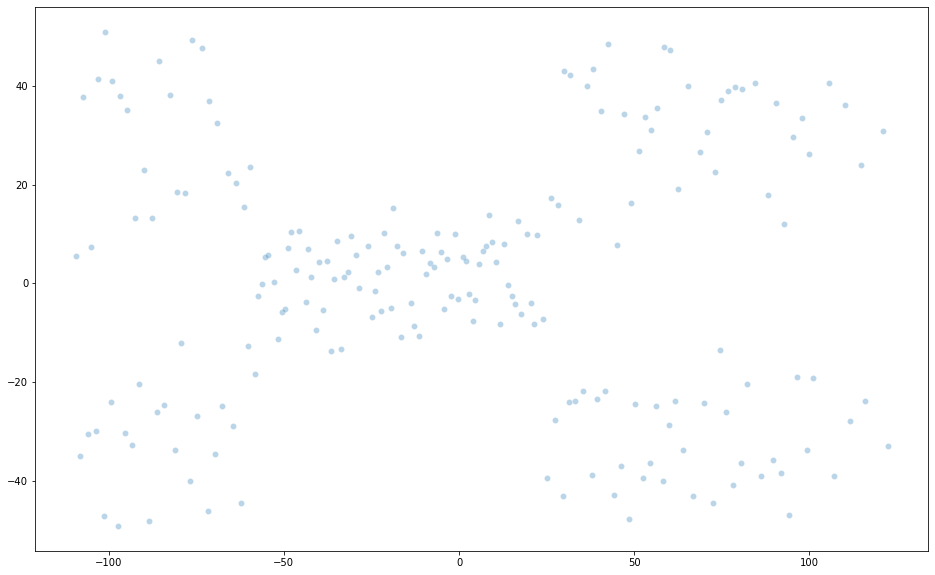

In [13]:
# applying PCA 
#new_df=df.drop(['Gender'],axis=1)

# apply features scaling
# https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_df)
#print(pca_result)

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    legend="full",
    alpha=0.3
)

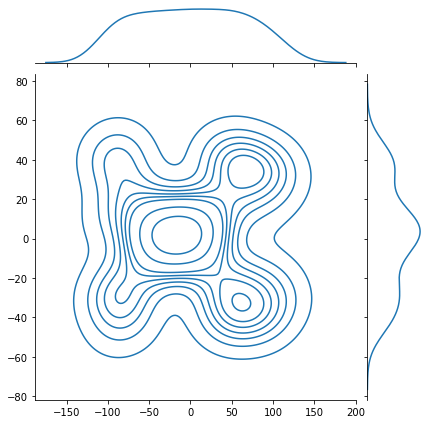

In [14]:
sns.jointplot(x=pca_result[:,0], y=pca_result[:,1], kind="kde")
plt.show()

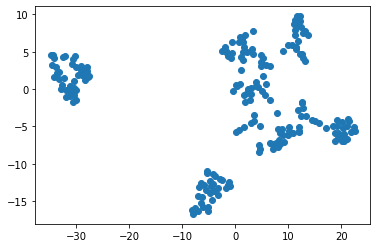

In [42]:
#Multivariate analysis on byte files
#this is with perplexity 20
import warnings
warnings.simplefilter('ignore')

from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=20)
results=xtsne.fit_transform(new_df.drop(['CustomerID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, cmap=plt.cm.get_cmap("jet", 9))
plt.clim(0.5, 9)
plt.show()

### Based on TSNE obervation few clusters are formed 

In [16]:
data = new_df.drop(['CustomerID','Male'], axis=1)
X = new_df.iloc[:,2:-1]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


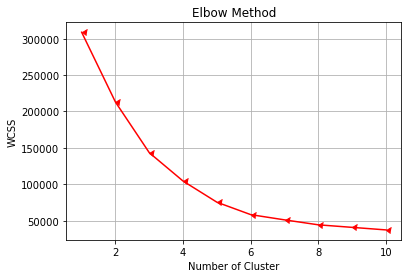

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
warnings.simplefilter('ignore')

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1,11),wcss,color='red',marker=4)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

#### Based on Elbow method there are few numbers to take a note of 4,5,6 

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


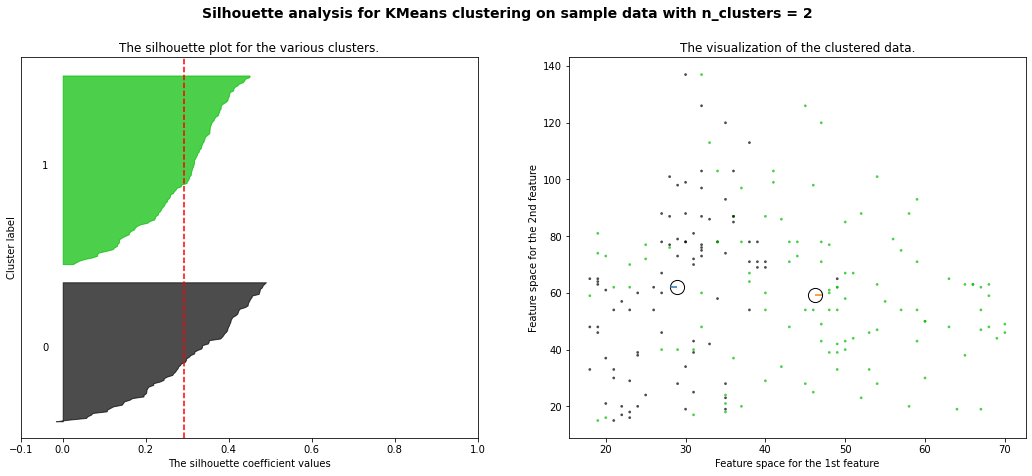

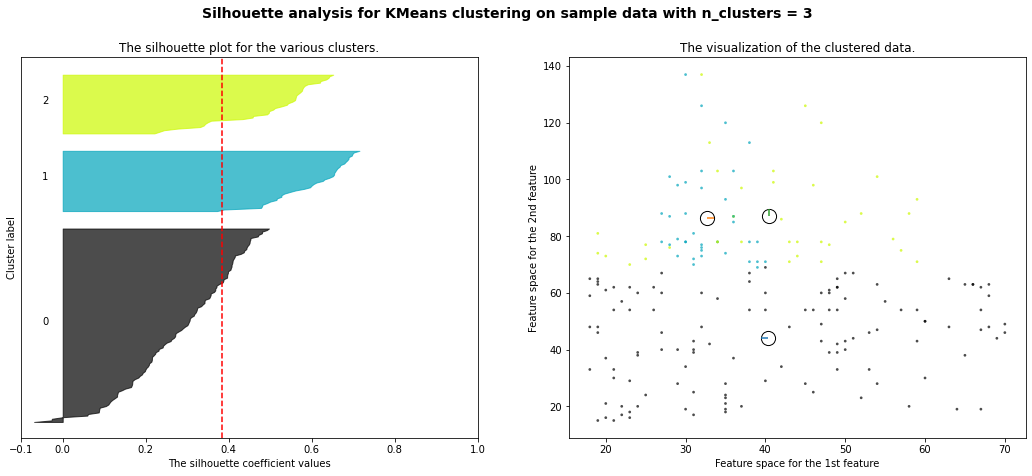

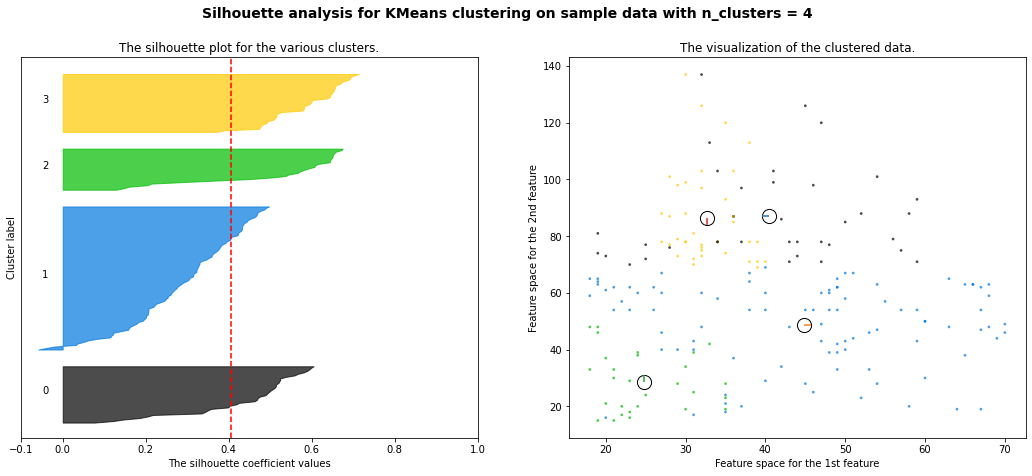

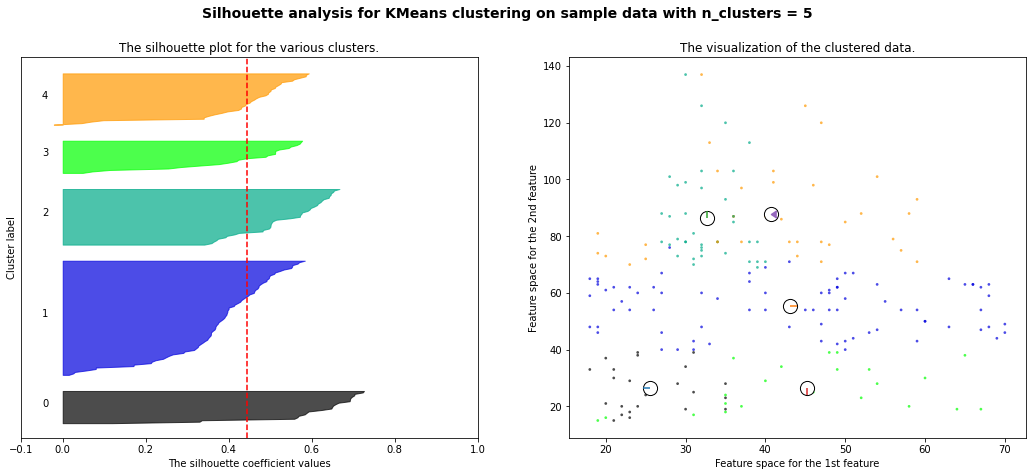

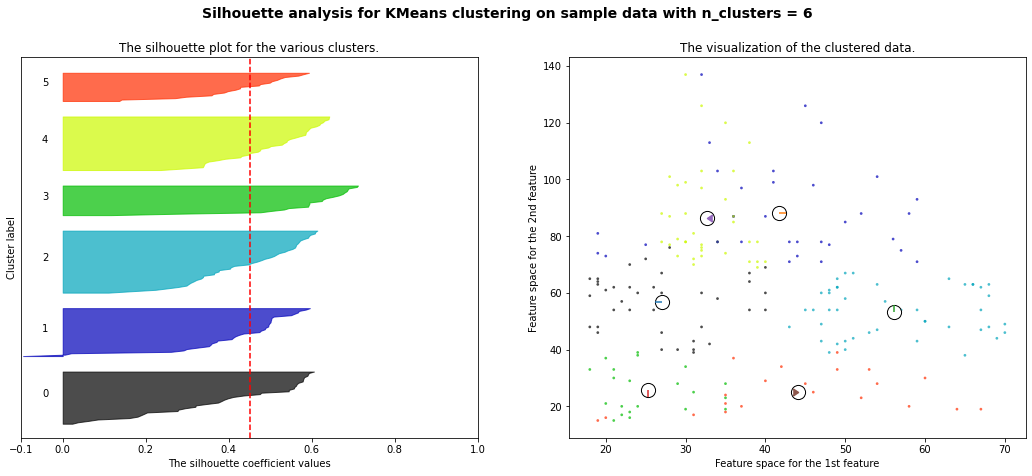

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.simplefilter('ignore')


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X=data
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=i , alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [40]:
# Combining the Output k=5 with the dataset.
y = KMeans(n_clusters=5,init='k-means++').fit_predict(X)

final_data = pd.concat([data,pd.Series(y)],axis=1)
final_data

,Age,Annual Income (k$),Spending Score (1-100),0
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,4
196,45,126,28,1
197,32,126,74,4
198,32,137,18,1


#### Trying out T-SNE to make sense out of the dataset with the Output

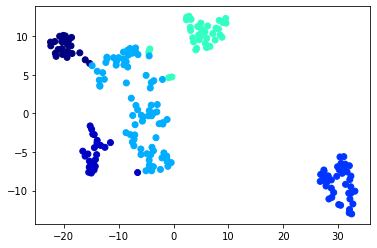

In [36]:
 #Multivariate analysis on byte files
#this is with perplexity 20
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=20)
results=xtsne.fit_transform(new_df.drop(['CustomerID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y,c=final_data[0],cmap=plt.cm.get_cmap("jet"))
plt.clim(0.5, 9)
plt.show()

##### The above Output is for the 5 cluster 

In [43]:
# Combining the Output k=6 with the dataset.
y = KMeans(n_clusters=6,init='k-means++').fit_predict(X)

final_data1 = pd.concat([data,pd.Series(y)],axis=1)
final_data1

,Age,Annual Income (k$),Spending Score (1-100),0
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


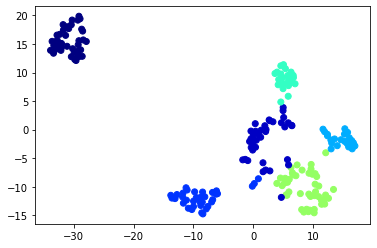

In [44]:
 #Multivariate analysis on byte files
#this is with perplexity 20
from sklearn.manifold import TSNE
xtsne=TSNE(perplexity=20)
results=xtsne.fit_transform(new_df.drop(['CustomerID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y,c=final_data1[0],cmap=plt.cm.get_cmap("jet"))
plt.clim(0.5, 9)
plt.show()

##### The above Output is for 6 Cluster

### Based on Elbow method and average silhouette_score the answer maybe 5 or 6. 
### The above plot shows the results of T-SNE and based on the output of the k-means clustering we had color coded them and just by obervation we can conclude that there are 5 clusters in the data set.